In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
#import cv2
import datetime
import os


import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import models
from tensorflow.keras.layers import Flatten, BatchNormalization, Dense, Dropout
from tensorflow.keras.layers import LeakyReLU
import keras
#from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.regularizers import l1, l2, l1_l2
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import experimental
from tensorflow import keras

In [2]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [3]:
train_dataset = image_dataset_from_directory(r"C:\Users\adhim\Desktop\Jowar Compressed Segemented\Binary_Classification\Train",
                                          image_size = (224, 224),
                                          #batch_size = 32,
                                          shuffle = True
                                          )

Found 368 files belonging to 2 classes.


In [4]:
val_dataset = image_dataset_from_directory( r"C:\Users\adhim\Desktop\Jowar Compressed Segemented\Binary_Classification\Validation",
                                                image_size = (224, 224),
                                                #batch_size = 32,
                                                shuffle = True
                                          )

Found 158 files belonging to 2 classes.


In [5]:
x_train = []
y_train = []

for image_batch, label_batch in train_dataset:
    for image, label in zip(image_batch, label_batch):
        x_train.append(image.numpy())
        y_train.append(label.numpy())

In [6]:
x_test = []
y_test = []

for image_batch, label_batch in val_dataset:
     for image, label in zip(image_batch, label_batch):
            x_test.append(image.numpy())
            y_test.append(label.numpy())

In [7]:
def preprocess_input(X, Y):
    
    X_p = tf.keras.applications.resnet50.preprocess_input(X)
    Y_p = tf.keras.utils.to_categorical(Y, 3)
    
    return X_p, Y_p

In [8]:
X_train, Y_train = preprocess_input(np.array(x_train), np.array(y_train))

In [9]:
X_test, Y_test = preprocess_input(np.array(x_test), np.array(y_test))

## Base Model

In [10]:
input_x = tf.keras.Input( shape = (224, 224, 3))

resnet_model = tf.keras.applications.ResNet50(include_top = False,
                                               weights = 'imagenet',
                                               input_tensor = input_x)

In [11]:
for layers in resnet_model.layers[:143]:
    
    layers.trainable = False

In [12]:
    model = models.Sequential()

    model.add(tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'))

    model.add(tf.keras.layers.experimental.preprocessing.RandomRotation(0.2))

    model.add(resnet_model)

    model.add(Flatten())

    model.add(BatchNormalization())

    model.add(Dense(256, activation = 'relu'))

    model.add(Dropout(0.5))

    model.add(BatchNormalization())

    model.add(Dense(128, activation = 'relu'))

    model.add(Dropout(0.5))

    model.add(BatchNormalization())

    model.add(Dense(64, activation = 'relu'))

    model.add(Dropout(0.5))

    model.add(BatchNormalization())

    model.add(Dense(3, activation = 'softmax'))

In [13]:
check_point = tf.keras.callbacks.ModelCheckpoint( filepath = 'jowar_pre.h5',
                                                 monitor = 'val_acc',
                                                 mode = "max",
                                                 )

In [14]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [15]:
history = model.fit(X_train, Y_train,
                    batch_size = 32,
                    epochs = 20,
                    validation_data = (X_test, Y_test),
                    callbacks = [check_point])

Epoch 1/20
12/12 [==============================] - 31s 2s/step - loss: 1.3412 - accuracy: 0.4239 - val_loss: 4.5255 - val_accuracy: 0.3228


C:\Users\adhim\anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


NotImplementedError: Layer ModuleWrapper has arguments in `__init__` and therefore must override `get_config`.

In [33]:
#Saving the model
import time
saved_model_path = "C:/Users/adhim/Desktop/Jowar Models/PreDefined/{}".format(int(time.time()))

keras.experimental.export_saved_model(model,saved_model_path)

AttributeError: module 'tensorflow.keras.experimental' has no attribute 'export_saved_model'

In [16]:
loss = history.history['loss']

accuracy = history.history['accuracy']

val_loss = history.history['val_loss']

val_accuracy = history.history['val_accuracy']

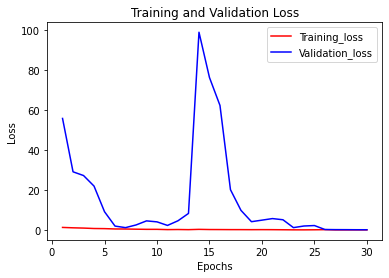

In [19]:
epochs = range(1, 31)

plt.plot(epochs, loss, 'r', label = 'Training_loss')

plt.plot(epochs, val_loss, 'b', label = 'Validation_loss')

plt.title('Training and Validation Loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.savefig('ResNet Loss.png')

plt.show()

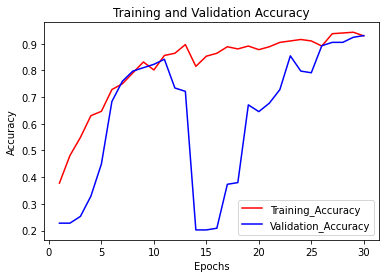

In [20]:
plt.plot(epochs, accuracy, 'r', label = 'Training_Accuracy')

plt.plot(epochs, val_accuracy, 'b', label = 'Validation_Accuracy')

plt.title('Training and Validation Accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

plt.savefig('ResNet Accuracy.png')

plt.show()

In [117]:
model.save('jowar_pre.h5')

In [118]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_5 (RandomFlip)   (None, 224, 224, 3)       0         
_________________________________________________________________
random_rotation_5 (RandomRot (None, 224, 224, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, 8, 8, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 100352)            401408    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               25690368  
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              